In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# import csv file
df = pd.read_csv("C:/Users/KylePC/10_Learning_Python/data/personality_datasert.csv", delimiter=',')

In [67]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


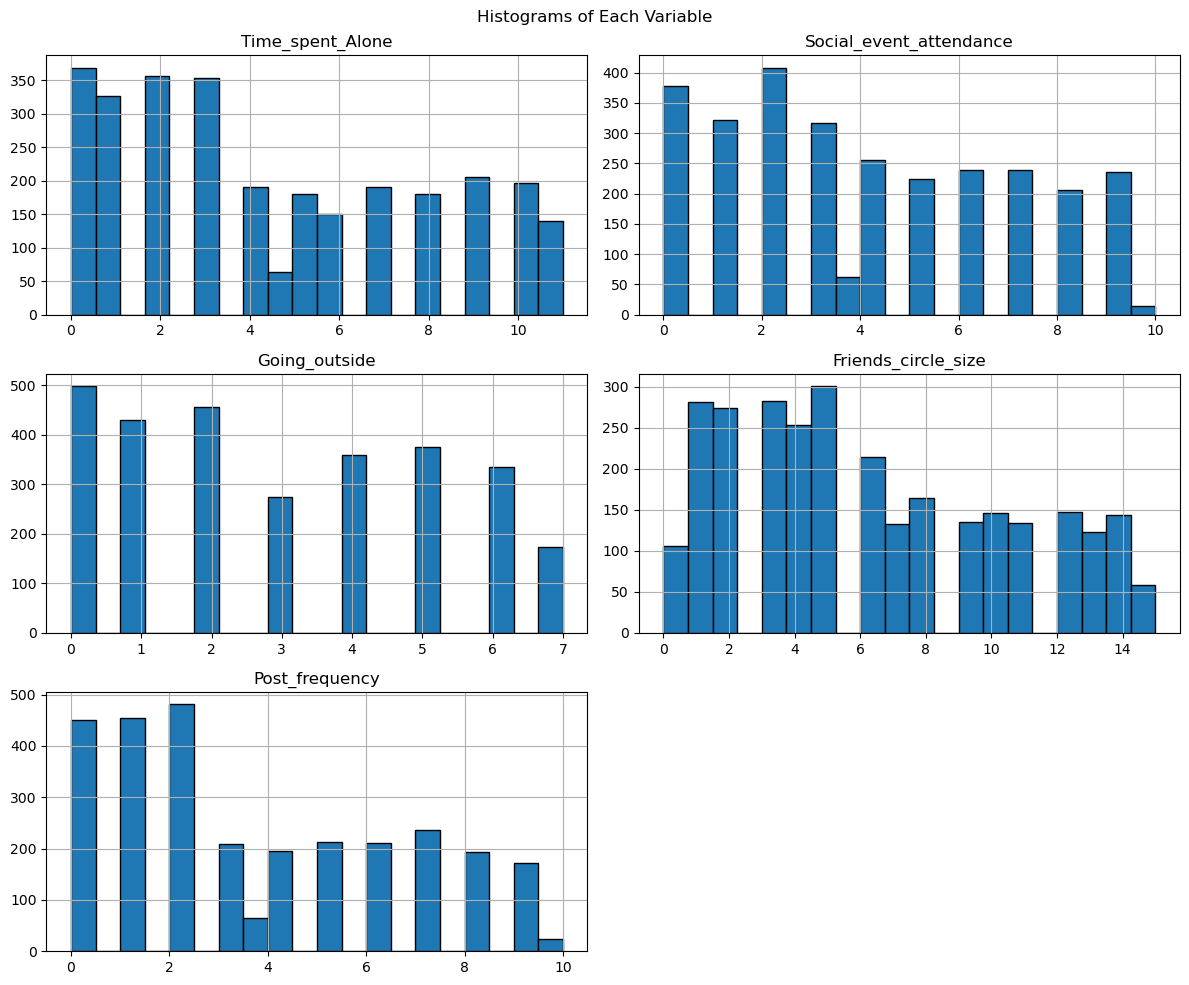

In [68]:
# Histogram of data
df.hist(bins=20, figsize=(12,10), edgecolor='black')
plt.suptitle('Histograms of Each Variable')
plt.tight_layout()
plt.show()

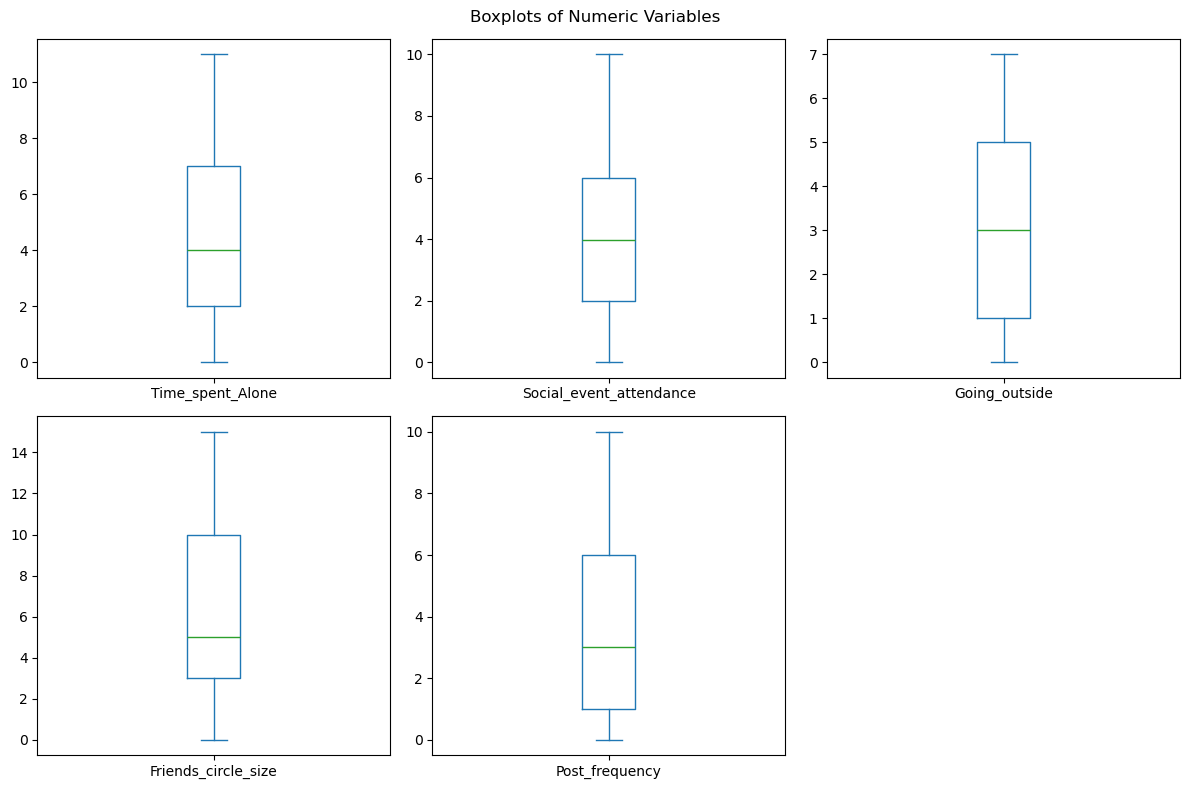

In [69]:
# Boxplots

# Select numeric columns
numeric_df = df.select_dtypes(include='number')

# Boxplot for all numeric columns
numeric_df.plot(kind='box', subplots=True, layout=(2,3), figsize=(12,8), sharex=False, sharey=False)
plt.suptitle('Boxplots of Numeric Variables')
plt.tight_layout()
plt.show()


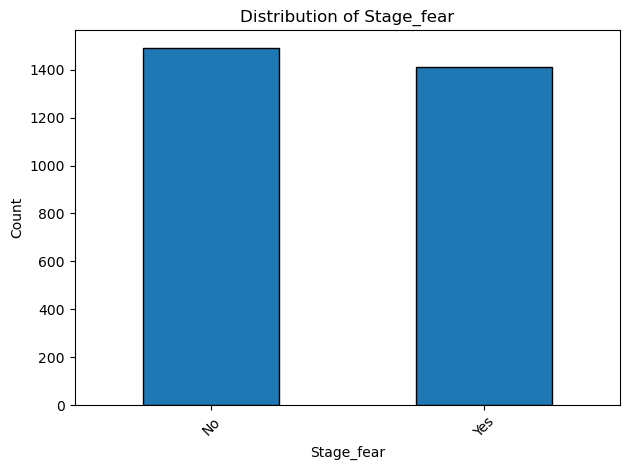

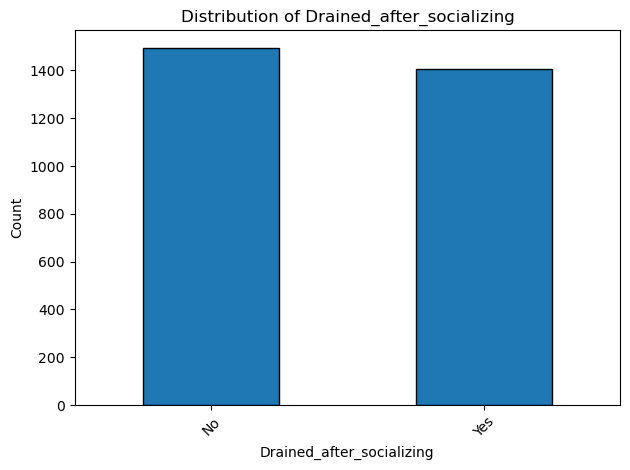

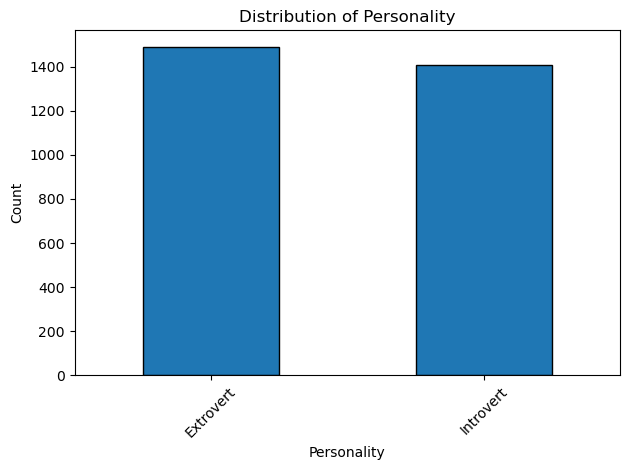

In [70]:
# Group count of categorical data
for column in df.select_dtypes(include='object').columns:
    plt.figure()
    df[column].value_counts().plot(kind='bar', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

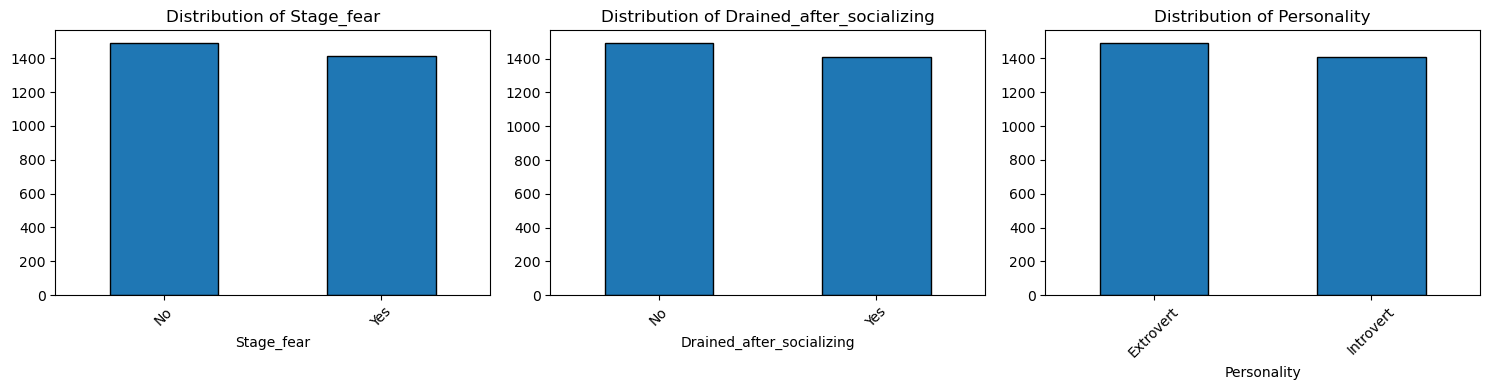

In [71]:
# Alternative way
import math
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns
n = len(cat_cols)
ncols = 3
nrows = math.ceil(n/ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))
axes = axes.flatten()

for i , col in enumerate(cat_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[i], edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()     

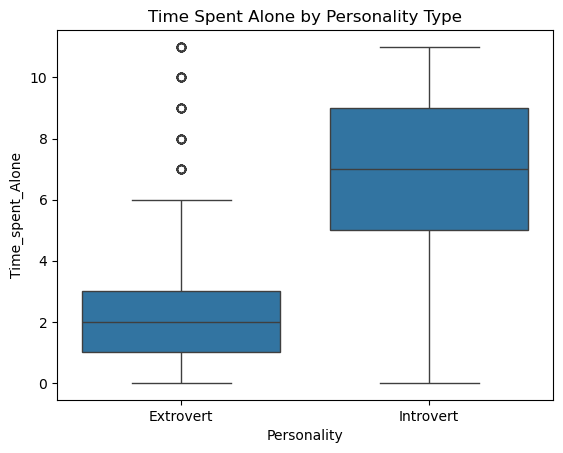

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='Personality', y='Time_spent_Alone')
plt.title('Time Spent Alone by Personality Type')
plt.show()

In [73]:
# T-test to compare group means (Time Spent Alone, Introvert vs Extrovert)
# H0 is that mean of Time Spent Alone between Introverts and Extrovert are the same.

from scipy.stats import ttest_ind
from utils import check_null_hypothesis_rejected

group1 = df[df['Personality'] == 'Introvert']['Time_spent_Alone']
group2 = df[df['Personality'] == 'Extrovert']['Time_spent_Alone']

t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
print(f'T-test p-value: {p_val:.4f}')

check_null_hypothesis_rejected(p_val)


T-test p-value: 0.0000
Reject the null hypothesis: There is a significant difference.


In [74]:
# Point-Biserial Correlation (Personality based on Time Spent Alone)
import pandas as pd
from scipy.stats import pointbiserialr
from utils import check_null_hypothesis_rejected

# Encode personality: introvert = 0 , extrovert = 1
df['extrovert_binary'] = df['Personality'].map({'Introvert': 0, 'Extrovert': 1})

# Compute point-biserial correlation
r, p = pointbiserialr(df['extrovert_binary'], df['Time_spent_Alone'])

print(f'Point-biserial correlation: {r:.3f}')
print(f'p-value: {p:.4f}')


Point-biserial correlation: -0.712
p-value: 0.0000
